# Calcul scientifique en Python

Nous nous intéressons à l'utilisation de Python dans le cadre du calcul scientifique, en particulier pour construire des représentations graphiques : suites, fonctions, calcul différentiel et intégral. 

Une remarque technique : ce document est un **notebook jupyter** qui mélange des cellules de texte au format **markdown** et des cellules de code `Python`. Les cellules markdown peuvent contenir du html mais ausiis du $\LaTeX$. Le $\LaTeX$ est un langage pour écrire des Mathématiques, il est entre des dollars.
Il est utile de savoir qu'on peut **ajouter des cases vides** en allant dans le menu insérer, et qu'on valide une cellule en tapant **Shift+Entrée**.

## Suites

Les algorithmes classiques concernant les suites sont
* le calcul d'un terme à l'aide d'une relation de récurrence,
* le calcul d'une somme de termes,
* le calcul du premier terme dépassant un seuil donné

In [ ]:
def terme(n,u0,f):
    u=u0
    for k in range(n):
        u=f(u)
    return u

Cette fonction applique `n` fois la fonction de récurrence `f` en partant du terme initial $u_0$ afin de calculer le terme $u_n$.

In [ ]:
def f(x):
    return x/2+5

print(terme(10,0,f))

Nous allons modifier légèrement la fonction `terme` afin qu'elle renvoie la liste de tous les termes calculés, et utiliser la bibliothèque `matplotlib` pour construire un graphique $(n;u_n)$.

In [ ]:
def termes(n,u0,f):
    u=u0
    l=[u]
    for k in range(n):
        u=f(u)
        l.append(u)
    return l

print(termes(10,0,f))

In [ ]:
import matplotlib.pyplot as plt
plt.plot(termes(10,0,f))
plt.show()

Par défaut la fonction `plot` relie les point : le style par défaut est `'b-'` ce qui signifie `blue` et relié. Remarquons que les abscisses sont correctes : lorsqu'on ne les précise pas, elles valent 0,1,2 ... ce qui nous convient bien ici.

Essayons le style `'ro'`. 


In [ ]:
plt.plot(termes(10,0,f),'ro')
plt.show()

**Ex0** Quelques styles à essayer : `'g^'`,`'ys'`,`'r--'`,`'b*'`

## Séries

Une série est une suite obtenue en ajoutant les termes d'une autres suite, comme par exemple lorsqu'on calcule des effectifs cumulés croissants ou des probabilités cumulées croissantes.
A partir d'une suite $(u_n)$ on peut définir la série $(s_n)$ par $\displaystyle s_n=u_0+u_1+u_2+\dots+u_n = \sum_{k=0}^n u_k$

In [ ]:
def somme(n,u0,f):
    u=u0
    s=u
    for k in range(n):
        u=f(u)
        s=s+u
    return s

Le calcul d'une somme est un exemple d'algorithme d'*accumulation*, dans lequel on ajoute les termes d'une suite dans une variable.

In [ ]:
print(somme(10,0,f))
liste=termes(10,0,f)
print('Vérification :')
print(liste)
print('La somme est : ',sum(liste))

**Ex1** Construire un graphique $(n;s_n)$ pour la série $(s_n)$ associée à la suite $1,\dfrac12,\dfrac14,\dfrac18\dots$ 

## Seuil

L'algorithme classique de bac ou de BTS ; il s'agit de déterminer à partir de quel rang les termes d'une suite dépassent un certain seuil.

Si on reprend la suite du début du TP, définie par $u_0=0$ et $u_{n+1} = \dfrac12 u_n +5$, on constate que les termes se rapprochent de $10$. 

A partir de quel rang va-t-on dépasser $9,9999$ ?

In [ ]:
def seuil(A):
    u=0
    n=0
    while u<A:
        u=u/2+5
        n=n+1
    return(n)

In [ ]:
print(seuil(9.9999)) #attention en Python le séparateur décimal est le point et non la virgule

Parfois on "déroule" un algorithme dans un tableau, pour illustrer les étapes du calcul.
Voici une modification de la fonction, avec un paramètre optionnel `verbeux` qui est faux par défaut.
Le mode verbeux affiche de quoi remplir un tableau comme celui ci-dessous.

$$\begin{array}{|c|c|c|}\hline n&u&u<A\\ \hline 0& 0 &True\\ \hline 1 & 5 & True \\ \hline 2 & 7,5 & True \\ \end{array}$$

In [ ]:
def seuil(A,verbeux=False):
    u=0
    n=0
    while u<A:
        if verbeux:
            print(f"u({n})={u}<{A} on continue la mission")
        u=u/2+5
        n=n+1
        if verbeux:
            print(f"maintenant on a u({n})={u}")
    return(n)

In [ ]:
print(seuil(9.9999))

In [ ]:
print(seuil(9.9999,True))

**Ex2** A partir de quel rang $n$ la suite $(z_n)$ définie par $z_0=0,1$ et $z_{n+1}=z_n+z_n (1-z_n)$ va-t-elle dépasser le seuil $0,99999$ ?

Représenter cette suite par un nuage de points.

## Un peu de hasard

La bibliothèque `random` permet de faire intervenir le hasard dans le déroulement de nos algorithmes. Evidemment il devient difficile d'obtenir les mêmes résultats que son voisin, sauf si...

In [ ]:
#Lançons un dé
import random
d=random.randint(1,6)
print(d)

In [ ]:
# Lançons trente dés (ou bien trente fois le même)
liste=[]  #une liste vide
for k in range(30):
    liste.append(random.randint(1,6))
print(liste)

La fonction `random.random` renvoit un réel compris dans l'intervalle $[0;1[$ (le sens des crochets est important). Cette fonction va nous permettre de simuler une marche aléatoire.

Une particule est initialement positionnée en $x=0$. A chaque unité de temps, la particule se déplace de façon équiprobable vers la gauche ($x$ diminue de 1) ou vers la droite ($x$ augmente de 1).

In [ ]:
x=0
l=[x]
for k in range(200):
    if random.random()<0.5:
        x=x+1
    else:
        x=x-1
    l.append(x)
plt.plot(l)
plt.show()

**Ex3** Valider plusieurs fois la cellule qui contient le code,en notant à chaque fois la distance maximale dont la particule s'est éloignée de l'origine. 
Réessayer avec $n=1000$ étapes, avec $n=10000$ étapes.

Sur le même thème, nous allons représenter plusieurs trajectoires sur un même graphique, puis nous intéresser à la position d'arrivée.

In [ ]:
for k in range(20):
    x=0
    l=[x]
    for i in range(200):
        if random.random()<0.5:
            x=x+1
        else:
            x=x-1
        l.append(x)
    plt.plot(l)


#on décore le graphique avant de l'afficher
plt.title('20 marches aléatoires de longueur $n=200$')
plt.xlabel('le temps')
plt.ylabel("distance à l'origine")
plt.show()

**Ex4** Modifier le code pour avoir 100 simulations de longueur $n=1000$.

In [ ]:
def marche(n=100,N=1):
    l=[]
    for k in range(N):
        x=0
        for i in range(n):
            if random.random()<0.5:
                x=x+1
            else:
                x=x-1
        l.append(x)
    return(l)

In [ ]:
marche()

In [ ]:
marche(100,10)

In [ ]:
l=marche(100,10000)
plt.boxplot(l,vert=False)
plt.show()

In [ ]:
m,M=min(l),max(l)
print(m,M)

def compte(l):
    m,M=min(l),max(l)
    nb=[0]*(M-m+1)
    for k in l:
        nb[-m+k]+=1
    return nb

plt.bar(range(m,M+1),compte(l))

**Ex5** Calculer la moyenne $\displaystyle\bar x= \dfrac1n \sum_{i=1}^n x_i$ et la variance $\displaystyle \sigma^{2} =\dfrac{1}{n} \sum_{i=1}^n x_i^2 - {\bar x}^2$ pour une série de $N=10000$ marches de longueur $n=1000$.

## Bilan de quelques constructions

### Le langage Python
* les blocs d'instructions sont reconnus grâce à l'indentation (le décalage du premier caractère par rapport au début de ligne)
* l'affectation se fait avec `=`, on peut effectuer plusieurs affectations simultanément
* on définit une fonction avec `def(`paramètres`):`
* le `:` commence un bloc
* l'alternative est `if`condition`:` bloc 1 `else:` bloc 2 (le `else` est optionnel et on peut tester plusieurs conditions avec `elif`)
* la boucle définie est `for` variable `in` liste `:` (liste est une liste ou bien n'importe quel type itérable)
* en particulier `range(n)` désigne les entiers $0, 1 , 2  \dots, n-2, n-1$ ce qui fait exactement $n$ entiers
* la boucle indéfinie est `while` condition `:` bloc ; attention si la condition reste toujours vraie alors le porgramme ne s'arrête pas
* une liste est constituée d'éléments séparés par des virgules, entourés par des `[]`
* `l.append(x)` permet d'ajouter un élément contenu dans la variable `x` à la fin de la liste `l`

### La bibliothèque `matplotlib`
On peut utiliser les fonctions de la bibliothèque `matplotlib` (ou plutôt de `matplotlib.pyplot`) en entrant

`import matplotlib.pyplot as plt`

puis en préfixant les fonctions avec `plt.`

* `show()` affiche le graphique
* `plot(y)` ou `plot(x,y)` trace des points à partir de leurs coordonnées (en prenant 0,1,2 etc en abscisse si on donne seulement les ordonnées
* `title`,`xlabel`,`ylabel` et `legend` permettent de décorer un peu le graphique ; les chaînes de caractères peuvent inclure du $\LaTeX$ entre des dollars.
* `savefig('nomfichier.png')` permet de sauvegarder un graphique dans un fichier

## Fonctions

On a déjà vu que lorsqu'on utilise `plot`, par défaut les points sont reliés. On va alors approcher des courbes de fonctions par des lignes brisées, représentant des fonctions affines par morceaux. Commençons par $f(x)=1-x^2$ définie sur $[-1;1]$.

In [ ]:
def f(x):
    return 1-x**2

In [ ]:
#avec cinq points
a,b=-1,1
n=5
h=(b-a)/(n-1)
x,y=[],[]
for k in range(n):
    x.append(a+k*h)
    y.append(f(a+k*h))
plt.title(f"$f(x)=1-x^2)$ avec {n} points")
plt.plot(x,y)

## Longueur d'un arc de parabole

**Ex6** Quelle est la longueur de la ligne brisée constituée de ces quatre segments ?

Bien sûr, quatre segments c'est peu. Vérifier qu'avec $n=100$ segments on trouve une longueur $l \approx 2,957826$ et n'oubliez pas de refaire le graphique !

Voici une occasion idéale pour écrire un algorithme d'accumulation.

Pour ceux qui se poseraient la question, la valeur exacte de cette longueur est $\dfrac 12 \ln \left(2+ \sqrt 5 \right) + \sqrt 5$.

In [ ]:
from math import sqrt,log
print(0.5*log(2+sqrt(5))+sqrt(5))

In [ ]:
from mpmath import mp #bibliothèque multi-precision math
mp.dps=100
print(0.5*mp.log(2+mp.sqrt(5))+mp.sqrt(5))

## La bibliothèque mpmath 

La bibliothèque `mpmath` permet de travailler avec un nombre de décimales quelconque.
* `mp.dps=1000` fixe le nombre de décimales (Decimal PlaceS in English) à 1000
* `a=mp.mpf(12)` crée un MultiPrecisionFloat qui vaut `12` mais en plus précis
* `mp.cos`, `mp.exp`, `mp.log` , `mp.sqrt` sont les fonction mathématiques usuelles mais en multi précision
* les opérateurs `+`, `-`, `*`, `/`, `**` sont redéfinis pour travailler en multi précision

In [ ]:
print(mp.pi)

**Ex7** Quelle est la 314e décimale de $\pi$ ? 

## Dichotomie

La méthode de la dichotomie permet d'obtenir un encadrement et une valeur approchée d'une solution d'une équation de la forme $f(x)=0$ sous certaines conditions.
On supposera que la fonction $f$ est continue sur l'intervalle $[a;b]$ (on peut tracer la courbe sans lever le crayon) et que $f(a) f(b) <0$ (la fonction change de signe).

In [ ]:
def f(x):
    y=x**3-12*x-45
    return y
    
def dicho(a,b,f,eps):
    while b-a>eps:
        c=(a+b)/2
        if f(a)*f(c)<0:
            b=c
        else:
            a=c
    return a,b

print(dicho(-7,9,f,0.001))

Dans l'exemple ci-dessus on cherche à résoudre l'équation $x^3=12 x+45$ dans l'intervalle $[-7;9]$. On remarquera que la précision $0,001$ ne permet pas d'avoir une valeur approchée de la solution au millième.

On peut admirer un déroulé pas-à-pas de la méthode <a href='goo.gl/UnaScx'>ici</a>. 

**Ex7** Représenter les deux fonctions $x \mapsto 12 x+45$ et $x \mapsto x^3$ sur l'intervalle $[-7;9]$. Quel pas choisir pour représenter chacune des deux fonctions ? 

### Un balayage décimal

On propose ici une autre méthode, de balayage décimal.

In [ ]:
def balayage(x,f,eps):
    h=1
    while h>eps:
        while f(x)*f(x+h)>0:
            x=x+h
        h=h/10
    return x+h/2

print(balayage(-7,f,0.0001))

**Ex8** Copier le code dans PythonTutor, puis expliquer l'algorithme en Français.

**Ex9** Ecrire une fonction `minimum(x,f,eps)` qui cherche un minimum local de la fonction `f`, en partant de la valeur `x`, avec une précision `eps`.

(Essentiellement, la condition de la boucle intérieure devient `f(x)>f(x+h)`).
Trouver un exemple de fonction qui trompe cet algorithme.


### La méthode de descente de la tangente de Newton

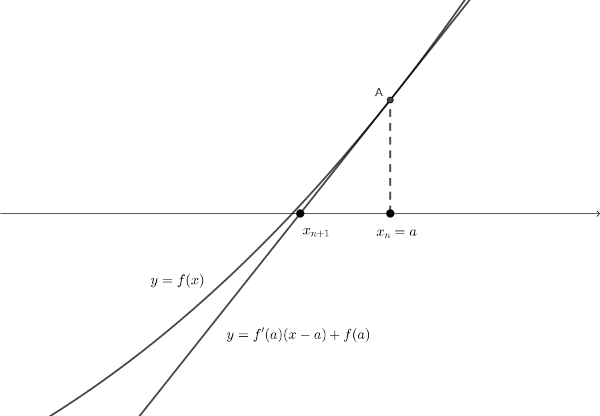

L'idée est de partir d'une première estimation de la solution, qu'on appelera $x_0$, puis de se laisser glisser le long de la tangente à la courbe de $f$ en $(x_0;f(x_0))$ jusqu'au point $(x_{1};0)$ de l'axe des abscisses. Puis on recommence.

In [ ]:
def diff(f,x,h=0.0001):
    return (f(x+h)-f(x-h))/(2*h)

In [ ]:
print(f(5),diff(f,5))

Pour estimer numériquement le coefficient directeur de la tangente, c'est-à-dire la vitesse instantanée d'évolution de la fonction, la fonction `diff` utilise une méthode de physicien : on prend un point de la courbe un tout petit peu à gauche de $(x;f(x))$ et un autre un tout petit peu à droite, et on calcule le coefficient directeur de la droite passant par ces deux points.

**Ex10** En partant de $x_0=5$ et en utilisant la méthode de Newton avec la fonction $f(x)=x^3-12x-45$, au bout de combien de termes la suite $(x_n)$ stabilise-t-elle les cent premières décimales ?

## Méthode d'Euler

Là aussi on va suivre la tangente, mais pour construire la courbe et non pour rejoindre l'axe des abscisses. Pour des raisons historiques, la fonction inconnue qu'on cherche à déterminer est notée $y$, et la variable s'appelle parfois $t$, parfois $x$.
* Une première possibilité est de construire la courbe d'une fonction à partir d'une condition initiale, la vitesse d'évolution étant donnée: on part de $(t_0;y_0)$ et on a $y'=f(t)$. La fonction $F$ cherchée a pour fonction dérivée la fonction $f$, on a $F'=f$, et $F$ est une **primitive** de $f$.  
* Une deuxième possibilité, on part de $(t_0;y_0)$ et la vitesse d'évolution $y'=f(t;y)$ est fonction de $t$ et de $y$, alors on parle d'une **équation différentielle**.

Dans les deux cas, la relation fondamentale est $y_{n+1}=y_n + h \times f(t_n ; y_n)$ où $h=t_{n+1}-t_n$ est le **pas** de la méthode.
Attention, il s'agit de calcul approché et pas de calcul exact ; ce qu'on construit est une ligne brisée qui approche la courbe de la fonction cherchée.

In [ ]:
x,y=0,9
h=0.5
abscisses,ordonnées=[x],[y]
while x<5:
    m=2*x-6    # on calcule le coefficient directeur de la tangente
    y=y+m*h    # on suit la tangente
    x=x+h
    abscisses.append(x)
    ordonnées.append(y)

plt.plot(abscisses,ordonnées)
plt.title("$y'=2x-6$ avec $y(0)=9$")

**Ex11** Tracer plusieurs lignes brisées sur le même graphique, avec des pas de plus en plus petits : `h=0.5`,`h=0.1`,`h=0.01`,`h=0.001`.

In [ ]:
import matplotlib.pyplot as plt

def Euler(x0,y0,f,h,xmax):
    x,y=x0,y0
    lx,ly=[x],[y]
    while x <xmax:
       m=f(x,y)
       x=x+h
       y=y+m*h
       lx.append(x)
       ly.append(y)
    return lx,ly

x,y=Euler(-3,1,lambda x,y:-x*y,0.01,5)

plt.plot(x,y)
plt.title("Solution approchée de $y'=-xy$ avec $y(-3)=1$")
plt.show()

**Ex12** Avec un pas `h=0.01`, quelle est la valeur trouvée pour $y(5)$ ?

**Ex13** En partant de $y(1)=0$, avec $y'=\dfrac1x$, résoudre $y>1$ avec un pas $h=0,01$, puis avec un pas $h=0,001$ et enfin avec un pas $h=0,0001$.

## Méthode des rectangles

Nous voulons estimer l'aire sous une courbe, plus précisément l'aire d'une partie du plan définie par $a \leqslant x \leqslant b$ et $0\leqslant y \leqslant f(x)$, par exemple avec $[a;b]=[0;1]$ et $f(x)=\dfrac4{1+x^2}$.

In [ ]:
def f(x):
    return 4/(1+x**2)

n=10
a,b=0,1
h=(b-a)/n
abscisses,ordonnées,coupures=[],[],[a]
for k in range(n):
    x=a+k*h+h/2
    y=f(x)
    abscisses.append(x)
    ordonnées.append(y)
    coupures.append(x+h/2)
    

plt.hist(abscisses, weights=ordonnées,bins=coupures,histtype='stepfilled')
plt.show()

Le résultat n'étant pas très joli, voici la même chose avec GeoGebra. 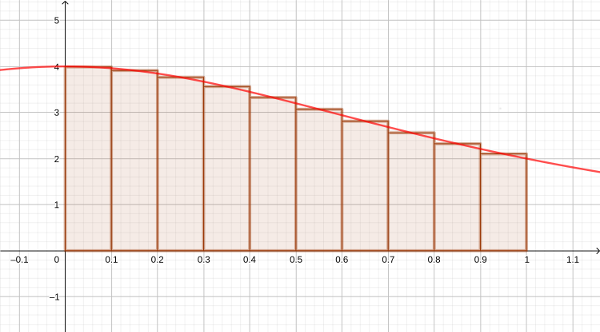

**Ex14** Ecrire une fonction `rectangles(a,b,f,n)` qui calcule l'aire totale des rectangles en découpant l'intervalle $[a;b]$ en $n$ intervalles de même longueur $h=\dfrac{b-a}n$. On prendra la hauteur de chaque rectangle de base $[x_k ; x_{k+1}]$ au milieu $f \left( \dfrac{x_k+x_{k+1}}2 \right)$.

**Ex15** Quelle méthode retrouve-t-on si on prend les hauteurs des rectangles au début de chaque intervalle $[x_k;x_{k+1}]$ ?

In [ ]:
plt.xkcd(scale=1, length=100, randomness=2)

La fonction `xkcd` permet de faire des graphiques qui ressemblent à des graphiques faits à la main, à la manière de l'excellent **Randall Munroe** dont on peut trouver la production sur son site <a href='http://xkcd.com'>xkcd</a>.

On peut revenir en arrière dans ce notebook et revalider toutes les entrées créant des graphiques.

## Quelques liens

* La <a href="docs.python.org/fr/3/">documentation officielle</a> de python et un <a href="https://docs.python.org/fr/3/tutorial/">tuto</a> un peu trop complet pour nous
* la documentation de <a href="https://matplotlib.org/">matplotlib</a>
* un cours en ligne sur `markdown` sur le site d'<a href="https://openclassrooms.com/fr/courses/1304236-redigez-en-markdown">OpenClassRooms</a>
* la bibliothèque mpmath <a href='http://mpmath.org/doc/current/basics.html'> site officiel</a>
* <a href="xkcd.com">xkcd</a>